# Hausaufgabe 3 (HA3): Churn prediction
Datenquelle: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Verwenden Sie die in der Vorlesung vorgestellten Methoden des überwachten Lernens, um den Customer Churn vorherzusagen. Welche Erkenntnisse leiten Sie ab?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
df = pd.read_csv('my_dataset.csv')
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,OrderCat_Fashion,OrderCat_Grocery,OrderCat_Laptop & Accessory,OrderCat_Mobile Device,PaymentMode_Cash on Delivery,PaymentMode_Credit Card,PaymentMode_Debit Card,PaymentMode_E wallet,MartialStatus_Married,MartialStatus_Single
0,1,0.121212,0,3,0.031746,1,0.625,0.4,2,0.727273,...,0,0,1,0,0,0,1,0,0,1
1,1,0.272727,0,1,0.095238,0,0.625,0.6,3,0.545455,...,0,0,0,1,0,0,0,0,0,1
2,1,0.272727,0,1,0.793651,0,0.375,0.6,3,0.454545,...,0,0,0,1,0,0,1,0,0,1
3,1,0.000000,0,3,0.317460,0,0.375,0.6,5,0.636364,...,0,0,1,0,0,0,1,0,0,1
4,1,0.000000,0,1,0.222222,0,0.625,0.4,5,0.181818,...,0,0,0,1,0,1,0,0,0,1


In [3]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'OrderCat_Fashion',
       'OrderCat_Grocery', 'OrderCat_Laptop & Accessory',
       'OrderCat_Mobile Device', 'PaymentMode_Cash on Delivery',
       'PaymentMode_Credit Card', 'PaymentMode_Debit Card',
       'PaymentMode_E wallet', 'MartialStatus_Married',
       'MartialStatus_Single'],
      dtype='object')

### Unabhängige Variablen (x) und Abhängige Variablen (y) zuweisen

In [4]:
# Assign features to independent variable X
features = ['Tenure', 'CityTier', 'CityTier',  'OrderCat_Fashion',
       'OrderCat_Grocery', 'OrderCat_Laptop & Accessory',
       'OrderCat_Mobile Device', 'PaymentMode_Cash on Delivery',
       'PaymentMode_Credit Card', 'PaymentMode_Debit Card',
       'PaymentMode_E wallet']
x = df[features]

In [5]:
# Assign features to dependent variable y
y = df['Churn']

In [6]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Modellierung mit Random forest 

In [7]:
# Create model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

In [8]:
# Train model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [9]:
# Output of Individual trees
model.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1256220448),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=222793353),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=2112996487),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=526214993),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1799686268),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=774678891),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=2079124635),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1315808642),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=224139692),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1037871671),
 DecisionTreeClassif

### Bewertung

In [10]:
# Get predictions on train and test data
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [11]:
# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy on train data: {accuracy_score(y_train, pred_train):0.2f}')
print(f'Accuracy on test data: {accuracy_score(y_test, pred_test):0.2f}')
print(f'Precision on train data: {precision_score(y_train, pred_train):0.2f}')
print(f'Precision on test data: {precision_score(y_test, pred_test):0.2f}')
print(f'Recall on train data: {recall_score(y_train, pred_train):0.2f}')
print(f'Recall on test data: {recall_score(y_test, pred_test):0.2f}')

Accuracy on train data: 0.87
Accuracy on test data: 0.84
Precision on train data: 0.75
Precision on test data: 0.63
Recall on train data: 0.30
Recall on test data: 0.26


In [12]:
# Get probabilities for calculation of ROC and AUC
from sklearn.metrics import roc_curve, auc
prob_train_pos = model.predict_proba(X_train)[:,1] # Positive class
prob_test_pos = model.predict_proba(X_test)[:,1] # Positive class

In [13]:
# False and true positive rates for train and test data
fpr_train, tpr_train, thr_train = roc_curve(y_train, prob_train_pos)
fpr_test, tpr_test, thr_test = roc_curve(y_test, prob_test_pos)

In [14]:
# Calculate AUC
print(f'AUC on train data: {auc(fpr_train, tpr_train):0.2f}')
print(f'AUC on test data: {auc(fpr_test, tpr_test):0.2f}')

AUC on train data: 0.88
AUC on test data: 0.83


### Visualisierung

Falls die Kurven stark voneinander abweichen, wäre Overfitting vorhanden.

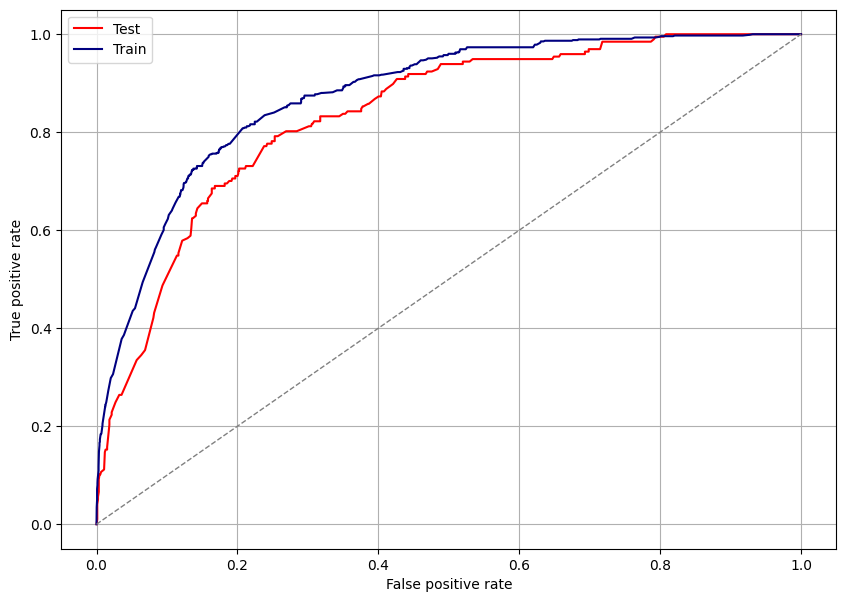

In [15]:
# Visualize ROC curves for train and test data
plt.figure(figsize=(10,7))
plt.plot(fpr_test, tpr_test, color='red', label='Test')
plt.plot(fpr_train, tpr_train, color='navy', label='Train')

plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(['Test', 'Train'])
plt.show()

##### Feature importances

In [16]:
# Calculate feature importances
feature_importance_df = pd.DataFrame(list(zip(model.feature_importances_, features)))
feature_importance_df.columns = ['feature_importance', 'feature']

feature_importance_df.sort_values('feature_importance', ascending=False)

,feature_importance,feature
0,0.725248,Tenure
6,0.091134,OrderCat_Mobile Device
5,0.037227,OrderCat_Laptop & Accessory
1,0.030027,CityTier
2,0.027484,CityTier
10,0.020861,PaymentMode_E wallet
3,0.019465,OrderCat_Fashion
8,0.015455,PaymentMode_Credit Card
7,0.014969,PaymentMode_Cash on Delivery
4,0.010930,OrderCat_Grocery
